In [121]:
#The time we all waited for
#or not
#I don't know, this dialogue is not even relevant for the code 
#I'm just here to entertain yall <3

In [122]:
#Import your libraries 
#Choose your character

In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [124]:
store_data = pd.read_csv("store_data_final.csv")

In [125]:
store_data.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Season,Event
0,2018,12,14,145,0,485385,Autumn,1
1,2018,12,15,144,0,485385,Autumn,1
2,2018,12,16,2,0,485385,Autumn,1
3,2018,12,17,131,0,485385,Autumn,1
4,2018,12,18,355,0,485385,Autumn,1


In [126]:
store_data.describe()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Event
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,2020.476534,6.767509,15.784116,611.270036,0.683032,476851.690253,0.300361
std,1.171521,3.478374,8.763530,498.704447,0.465463,254367.861590,0.458581
min,2018.000000,1.000000,1.000000,0.000000,0.000000,31727.000000,0.000000
25%,2019.000000,4.000000,8.000000,229.000000,0.000000,249804.000000,0.000000
50%,2021.000000,7.000000,16.000000,495.000000,1.000000,507502.000000,0.000000
75%,2022.000000,10.000000,23.000000,840.000000,1.000000,727905.000000,1.000000
max,2022.000000,12.000000,31.000000,2724.000000,1.000000,832926.000000,1.000000


In [127]:
store_data.shape

(1385, 8)

In [128]:
store_data.dtypes

Ano                int64
Mes                int64
Dia                int64
Visitantes         int64
COVID              int64
Total Turistas     int64
Season            object
Event              int64
dtype: object

In [129]:
store_data = store_data.astype({"Ano":str, "Mes": str, "Dia": str})

In [130]:
store_data.dtypes

Ano               object
Mes               object
Dia               object
Visitantes         int64
COVID              int64
Total Turistas     int64
Season            object
Event              int64
dtype: object

In [131]:
store_data.isna().sum()

Ano               0
Mes               0
Dia               0
Visitantes        0
COVID             0
Total Turistas    0
Season            0
Event             0
dtype: int64

In [132]:
#Okie before we continue, we gotta get our dummies first
#Like the season column, we gotta change that data
#For that I'm also gonna create a new variable to store our new df with the dummies

In [133]:
store_df = pd.get_dummies(store_data, columns=["Season"])

In [134]:
store_df.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Event,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2018,12,14,145,0,485385,1,1,0,0,0
1,2018,12,15,144,0,485385,1,1,0,0,0
2,2018,12,16,2,0,485385,1,1,0,0,0
3,2018,12,17,131,0,485385,1,1,0,0,0
4,2018,12,18,355,0,485385,1,1,0,0,0


In [135]:
#Okay let's get some visuals now

C:\Users\betti\AppData\Local\Temp\ipykernel_7952\149716358.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


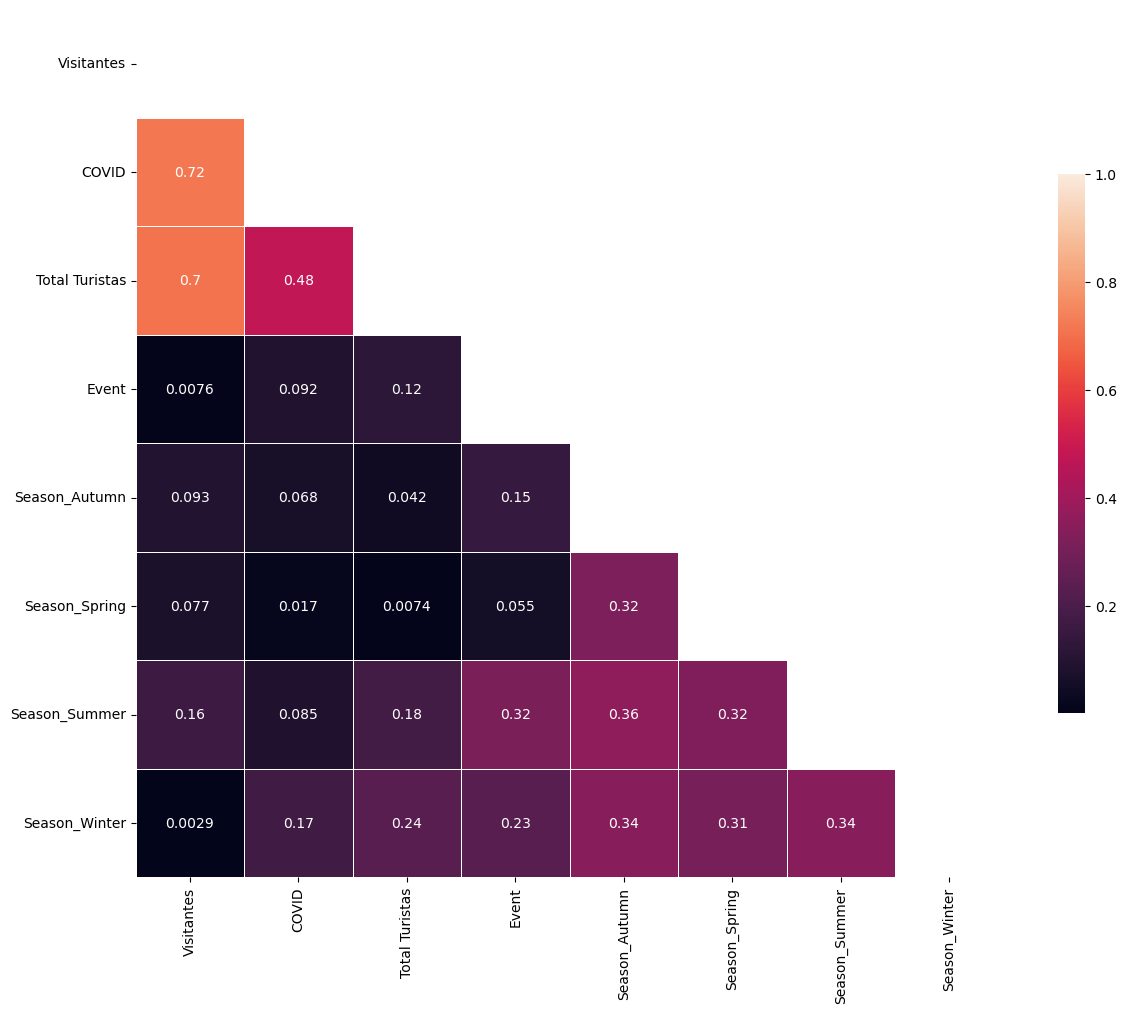

In [136]:
corr=np.abs(store_df.corr())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 14))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

In [137]:
#We can see that the number of visitiors is highly correlated with the year, if the year was before or post COVID, the total of tourists in Lisbon and if the season is summer
#Unlike our first assumption, or my assumption, event doesnt impact as much

In [138]:
#Okay, let's try to predict this shit now
#What we wanna predict is the number of visitors in a day

In [139]:
#separate the features and target variable

X = store_df.drop("Visitantes", axis=1)
y = store_df["Visitantes"]

In [140]:
#split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [141]:
#Now we choose which type of prediction model we gonna use
#Let's start with xboost or what I like to call xbosta

In [142]:
xgb_model = xgb.XGBRegressor() #first we define the model

In [143]:
#now we gotta train the model
#xgb_model.fit(X_train,y_train)

In [144]:
#y_pred = xgb_model.predict(X_test)

In [145]:
#xgb_model.score(X_test,y_test)

In [146]:
#mse = mean_squared_error(y_test,y_pred)

In [147]:
#mse

In [148]:
#Let's see if random forest gives us a better score

In [149]:
rf = RandomForestRegressor()

In [150]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [151]:
rf.score(X_test,y_test)

0.8744531450278238

In [152]:
y_pred = rf.predict(X_test)

In [153]:
mse = mean_squared_error(y_test,y_pred)

In [154]:
mse

30046.313378339346

In [155]:
error = np.sqrt(mse)

In [156]:
error

173.33872440496194

In [157]:
#as you can see the prediction error is still high, lets run another random forrest regressor model but with less labels
#lets get the columns with more correlation to the visitors entrance in the heatmap

In [158]:
store_df.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Event,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2018,12,14,145,0,485385,1,1,0,0,0
1,2018,12,15,144,0,485385,1,1,0,0,0
2,2018,12,16,2,0,485385,1,1,0,0,0
3,2018,12,17,131,0,485385,1,1,0,0,0
4,2018,12,18,355,0,485385,1,1,0,0,0


In [159]:
df = store_df[["Visitantes","Mes","Dia","COVID","Total Turistas","Season_Summer","Event"]]

In [160]:
#let's split the data again into train and test

In [161]:
X = df.drop("Visitantes", axis=1)
y = df["Visitantes"]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [163]:
#Let's use random forest again cause it got a better score

In [164]:
rf = RandomForestRegressor()

In [165]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [166]:
y_pred = rf.predict(X_test)

In [167]:
rf.score(X_test,y_test)

0.8827438093195055

In [168]:
mse = mean_squared_error(y_test, y_pred)

In [169]:
erro = np.sqrt(mse)

In [170]:
erro

153.65261763516162

In [171]:
#okie so because year and covid are highly correlated, we dropped the year and got a better score
#but the prediction error is still high
#let's try normalizing the data

In [172]:
scaler = StandardScaler()

In [173]:
df_normalized = store_data

In [174]:
#df_normalized["Total Turistas Norm"] = scaler.fit(df_normalized["Total Turistas"])

In [175]:
#Let's try to divide the total of tourists by 30 because the total tourists represents the total in a month

In [176]:
#df["Total Turistas"] = df["Total Turistas"]/30

In [177]:
df.head()

,Visitantes,Mes,Dia,COVID,Total Turistas,Season_Summer,Event
0,145,12,14,0,485385,0,1
1,144,12,15,0,485385,0,1
2,2,12,16,0,485385,0,1
3,131,12,17,0,485385,0,1
4,355,12,18,0,485385,0,1


In [178]:
X = df.drop("Visitantes", axis=1)
y = df["Visitantes"]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [180]:
rf = RandomForestRegressor()

In [181]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [182]:
rf.score(X_test,y_test)

0.8923473406615023

In [183]:
y_pred = rf.predict(X_test)

In [184]:
mse = mean_squared_error(y_test, y_pred)

In [185]:
mse

31268.859175090252

In [186]:
error = np.sqrt(mse)

In [187]:
error

176.83002905358086

In [188]:
#okie so we saw that dividing by 30 already helped, let's make a proper function for it

In [189]:
def total_tourists_div(row):
    if row["Mes"] in ("1","3","5","7","8","10","12"):
        return row["Total Turistas"]/31
    if row["Mes"] in ("4","6","9","11"):
        row["Total Turistas"]/30
    if row["Mes"] == "2":
        if row["Ano"] in ("2018","2020","2021","2022"):
            return row["Total Turistas"]/28
        else:
            return row["Total Turistas"]/29
    else:
        return row["Total Turistas"]/30

In [190]:
def total_tourists_div_num(row):
    if row["Mes"] in (1,3,5,7,8,10,12):
        return row["Total Turistas"]/31
    if row["Mes"] in (4,6,9,11):
        row["Total Turistas"]/30
    if row["Mes"] == 2:
        if row["Ano"] in (2018,2020,2021,2022):
            return row["Total Turistas"]/28
        else:
            return row["Total Turistas"]/29
    else:
        return row["Total Turistas"]/30

In [191]:
store_data.dtypes

Ano               object
Mes               object
Dia               object
Visitantes         int64
COVID              int64
Total Turistas     int64
Season            object
Event              int64
dtype: object

In [192]:
store_data.isna().sum()

Ano               0
Mes               0
Dia               0
Visitantes        0
COVID             0
Total Turistas    0
Season            0
Event             0
dtype: int64

In [193]:
store_data["Total Turistas"] = store_data.apply(total_tourists_div,axis=1)

In [194]:
store_data.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Season,Event
0,2018,12,14,145,0,15657.580645,Autumn,1
1,2018,12,15,144,0,15657.580645,Autumn,1
2,2018,12,16,2,0,15657.580645,Autumn,1
3,2018,12,17,131,0,15657.580645,Autumn,1
4,2018,12,18,355,0,15657.580645,Autumn,1


In [195]:
df = store_df[["Visitantes","Mes","Dia","COVID","Total Turistas","Season_Summer","Event"]]

In [196]:
X = df.drop("Visitantes",axis=1)
y = df["Visitantes"]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [198]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [199]:
rf.score(X_test,y_test)

0.8415816489789123

In [200]:
y_pred = rf.predict(X_test)

In [201]:
mse = mean_squared_error(y_test, y_pred)

In [202]:
mse

36936.88839638989

In [203]:
error = np.sqrt(mse)

In [204]:
error

192.18971979892652

In [205]:
#Ok let's transform Day, Month and Year in int again

In [206]:
#store_data = store_data.astype({"Ano":int, "Mes":int, "Dia":int})

In [207]:
store_data.dtypes

Ano                object
Mes                object
Dia                object
Visitantes          int64
COVID               int64
Total Turistas    float64
Season             object
Event               int64
dtype: object

In [208]:
store_data.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Season,Event
0,2018,12,14,145,0,15657.580645,Autumn,1
1,2018,12,15,144,0,15657.580645,Autumn,1
2,2018,12,16,2,0,15657.580645,Autumn,1
3,2018,12,17,131,0,15657.580645,Autumn,1
4,2018,12,18,355,0,15657.580645,Autumn,1


In [209]:
#Let's find some outliers

In [210]:
Q1 = store_data["Visitantes"].quantile(0.25)
Q3 = store_data["Visitantes"].quantile(0.75)

IQR = Q3-Q1

In [211]:
store_data = store_data[~((store_data["Visitantes"] < (Q1 - 1.5 * IQR)) | (store_data["Visitantes"] > (Q3 + 1.5 * IQR)))]

In [212]:
store_data.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Season,Event
0,2018,12,14,145,0,15657.580645,Autumn,1
1,2018,12,15,144,0,15657.580645,Autumn,1
2,2018,12,16,2,0,15657.580645,Autumn,1
3,2018,12,17,131,0,15657.580645,Autumn,1
4,2018,12,18,355,0,15657.580645,Autumn,1


In [213]:
store_data.shape

(1327, 8)

In [214]:
store_data.isna().sum()

Ano               0
Mes               0
Dia               0
Visitantes        0
COVID             0
Total Turistas    0
Season            0
Event             0
dtype: int64

In [215]:
store_data[store_data["Visitantes"]<10].count()

Ano               58
Mes               58
Dia               58
Visitantes        58
COVID             58
Total Turistas    58
Season            58
Event             58
dtype: int64

In [216]:
store_data = store_data[store_data["Visitantes"]>10]

In [217]:
store_data.shape

(1268, 8)

In [218]:
store_df = pd.get_dummies(store_data, columns=["Season"])

In [219]:
store_df.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Event,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2018,12,14,145,0,15657.580645,1,1,0,0,0
1,2018,12,15,144,0,15657.580645,1,1,0,0,0
3,2018,12,17,131,0,15657.580645,1,1,0,0,0
4,2018,12,18,355,0,15657.580645,1,1,0,0,0
6,2018,12,20,1267,0,15657.580645,1,1,0,0,0


In [220]:
df = store_df[["Visitantes","Mes","Dia","COVID","Total Turistas","Season_Summer","Event"]]

In [221]:
df.head()

,Visitantes,Mes,Dia,COVID,Total Turistas,Season_Summer,Event
0,145,12,14,0,15657.580645,0,1
1,144,12,15,0,15657.580645,0,1
3,131,12,17,0,15657.580645,0,1
4,355,12,18,0,15657.580645,0,1
6,1267,12,20,0,15657.580645,0,1


In [222]:
df.isna().sum()

Visitantes        0
Mes               0
Dia               0
COVID             0
Total Turistas    0
Season_Summer     0
Event             0
dtype: int64

In [223]:
X = df.drop("Visitantes",axis=1)
y = df["Visitantes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [225]:
rf.score(X_test,y_test)

0.8556935911621163

In [226]:
y_pred = rf.predict(X_test)

In [227]:
mse = mean_squared_error(y_test,y_pred)
error = np.sqrt(mse)

In [228]:
error

154.26120918191884

In [229]:
#Grid search time

In [230]:
# we need to define what we consider the "full list" of hyperparameters
# Number of trees in random forest
n_estimators = [10,100,500,1000]
# Mximum number of total leaves to consider
max_leaf_nodes = [15, 30, 40]
# Maximum number of levels in each tree
max_depth = [5,10]

In [231]:
# Create the  grid
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'n_estimators': n_estimators,
        'max_leaf_nodes': max_leaf_nodes,
        'max_depth': max_depth}

In [232]:
# Instantiate the grid search model object
# estimator -> model to optimize
forest = RandomForestRegressor()
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds <------ CV is REALLY important in grid search. Why?
grid_search = GridSearchCV(estimator = forest, param_grid = grid, cv = 5)

In [233]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'max_leaf_nodes': [15, 30, 40],
                         'n_estimators': [10, 100, 500, 1000]})

In [234]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'max_leaf_nodes': 40, 'n_estimators': 1000}
Best cross-validation score:  0.7976705337674612


In [235]:
rf = RandomForestRegressor(max_depth= 10, max_leaf_nodes= 40, n_estimators= 1000)

In [236]:
rf.fit(X_train,y_train)

rf.score(X_test,y_test)

0.8499515014235061

In [237]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
error = np.sqrt(mse)

In [238]:
error

157.30037166984022

In [239]:
print(X_train)

     Mes Dia  COVID  Total Turistas  Season_Summer  Event
100    3  26      0    20525.322581              0      0
884    8  15      1    15500.193548              1      0
1016  12  26      1    11472.129032              0      1
33     1  18      0    14818.709677              0      1
877    8   8      1    15500.193548              1      0
...   ..  ..    ...             ...            ...    ...
177    6  11      0    25937.166667              0      1
581    9  12      1     7740.966667              1      0
1142   5   2      1    23480.806452              0      0
609   10  10      1     6208.677419              0      0
840    7   2      1     9238.032258              1      0

[1014 rows x 6 columns]


In [240]:
df.head()

,Visitantes,Mes,Dia,COVID,Total Turistas,Season_Summer,Event
0,145,12,14,0,15657.580645,0,1
1,144,12,15,0,15657.580645,0,1
3,131,12,17,0,15657.580645,0,1
4,355,12,18,0,15657.580645,0,1
6,1267,12,20,0,15657.580645,0,1


In [241]:
store_data.head()

,Ano,Mes,Dia,Visitantes,COVID,Total Turistas,Season,Event
0,2018,12,14,145,0,15657.580645,Autumn,1
1,2018,12,15,144,0,15657.580645,Autumn,1
3,2018,12,17,131,0,15657.580645,Autumn,1
4,2018,12,18,355,0,15657.580645,Autumn,1
6,2018,12,20,1267,0,15657.580645,Autumn,1


In [243]:
store_data.to_csv("store_data_final.csv", index=False)